# Featuring Enginnering Using Scikit-Learn

### Do You Want to Build a Snowman?

Let's prep some data for a model to predict the heigh of snowman.

<img src = "./images/olaf.jpeg">

#### Load Packages

In [ ]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine-learning stack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    KBinsDiscretizer,
    PolynomialFeatures,
    FunctionTransformer
)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

#### Load Data

In [4]:
data = {
    'temp' : [-3, 5, 0, 7, 3, -1, 1, None, -6, 3, 0, -1, None, -2],
    'lunch' : ['soup', 'sandwich', 'soup', 'burger', 'sandwich', 'soup', 'cereal', 'salad', 'sandwich', 'burger', 'soup', 'cereal', 'burger', 'soup'],
    'dinner' : ['pizza', 'pizza', 'noodles', None, 'fishsticks', 'pizza', None, 'fishsticks', 'noodles', 'pizza', None, 'pizza', 'fishsticks', 'pizza'],
    'precipitation' : ['yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no'],
    'heigth_snowman_cm' : [100, 0, 75, 0, 20, 25, 0, 35, 170, 0, 85, 85, 45, 0]
}

df_train = pd.DataFrame(data=data)
df_train

,temp,lunch,dinner,precipitation,heigth_snowman_cm
0,-3.0,soup,pizza,yes,100
1,5.0,sandwich,pizza,no,0
2,0.0,soup,noodles,yes,75
3,7.0,burger,None,yes,0
4,3.0,sandwich,fishsticks,yes,20
5,-1.0,soup,pizza,yes,25
6,1.0,cereal,None,no,0
7,NaN,salad,fishsticks,yes,35
8,-6.0,sandwich,noodles,yes,170
9,3.0,burger,pizza,no,0


#### Exercise
Transform the data above using scikit-learn tool in a way that is suitable to be used for modeling
+ **Separate the DataFrame `df_train` into `X_train` and `y_train`** 
   +  Our target variable is `eigth_snowman_cm`
+ **Preprocess `X_train`**:
  + Identify which variables are **binary**, **categorical** and  **numeric**
  + Check which variables have **missing values**
    + **Impute missing value** as needed using appropriate strategy
  + Determine if categorical variables have **non-numeric values**
    + **Encode categorical variables** using techniques such as one-hot encoding
  + Determine if numeric variables on different scale
    + **Scale numeric variables**
+ **Create `X_train_fe`**:
    + Once the preprocessing steps are completed, compile the transformed columns into a new DataFrame called `X_train_fe`. 


1. **Separate the DataFrame `df_train` into `X_train` and `y_train`**

In [8]:
target = 'heigth_snowman_cm'

In [9]:
# Feature matrix
X_train = df_train.drop(target,axis=1)
y_train = df_train[target]

In [11]:
X_train.columns

Index(['temp', 'lunch', 'dinner', 'precipitation'], dtype='object')

2.1 **Identify which variables are binary, categorical and  numeric**

| Column Name | Type     |
|----------|----------------|
| temp       |numeric   |
| lunch        | categorical nominal|
| dinner        | categorical nominal|
| precipitation        | categorical binary|


| Column Name           | Type                                      | Value                                                                 |
|----------------|-------------------------------------------|-----------------------------------------------------------------------|
| temp | numeric                               | <class 'sklearn.compose._column_transformer.ColumnTransformer'>       |
| LinearRegression  | abc.ABCMeta                               | <class 'sklearn.linear_model._base.LinearRegression'>                 |
| Pipeline          | abc.ABCMeta                               | <class 'sklearn.pipeline.Pipeline'>                                   |
| X_train           | pandas.core.frame.DataFrame              | DataFrame with columns: temp, lunch, dinner, precipitation             |
| data              | dict                                      | {'temp': [-3, 5, 0, 7, 3, -1, 1, None, -6, 3, 0, -1, None, -2], ...}  |
| df_train          | pandas.core.frame.DataFrame              | DataFrame with columns: temp, lunch, dinner, precipitation, heigth_snowman_cm |
| target            | str                                       | 'heigth_snowman_cm'                                                   |
| y_train           | pandas.core.series.Series                | Series with target variable values                                    |

2.2 **Check which variables have missing values**

In [13]:
X_train.isna().sum()

temp             2
lunch            0
dinner           3
precipitation    0
dtype: int64

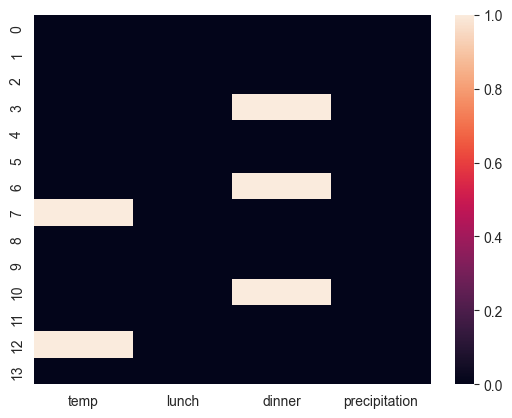

In [15]:
sns.heatmap(data=X_train.isna());

The variables `temp` and `dinner` contain missing values at observations 7 and 12 for `temp`, and at observations 3, 6, and 10 for `dinner`, respectively.

2.3 **Impute missing values**

**Numeric Variable `temp`**

We can fill the missing values by interpolation 

In [ ]:
def interpolate(X,column):
    X_copy = X.copy()
    X_copy[f'{column}_interpoleted'] = X_copy[[column]].interpolate()
    return X_copy[[f'{column}_interpoleted']]

In [25]:
from sklearn.preprocessing import FunctionTransformer

In [26]:
interpolater = FunctionTransformer(interpolate,kw_args={'column':'temp'})

In [27]:
interpolater.fit(X_train)

FunctionTransformer(func=<function interpolate at 0x14d713d80>,
                    kw_args={'column': 'temp'})

In [65]:
temp_interpolated_train= interpolater.transform(X_train)
temp_interpolated_train

,temp_interpoleted
0,-3.0
1,5.0
2,0.0
3,7.0
4,3.0
5,-1.0
6,1.0
7,-2.5
8,-6.0
9,3.0


**Nominal Variable `dinner`**

We can fill the missing valjue by using as strategy the most frequest category

In [36]:
dinner_imputer = SimpleImputer(missing_values=None, strategy='most_frequent',).set_output(transform='pandas')

In [37]:
dinner_imputer.fit(X_train[['dinner']])

SimpleImputer(missing_values=None, strategy='most_frequent')

In [51]:
dinner_imputed_train = dinner_imputer.transform(X_train[['dinner']])
dinner_imputed_train

,dinner
0,pizza
1,pizza
2,noodles
3,pizza
4,fishsticks
5,pizza
6,pizza
7,fishsticks
8,noodles
9,pizza


2.4 **Encode Categorical variabels**

**`lunch` and `precipitation`**

In [52]:
subset_categoric = ['lunch', 'precipitation']

In [53]:
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [54]:
ohe_encoder.fit(X_train[subset_categoric])

OneHotEncoder(drop='first', sparse_output=False)

In [63]:
lunch_prep_encoded_train = ohe_encoder.transform(X_train[subset_categoric])
lunch_prep_encoded_train

,lunch_cereal,lunch_salad,lunch_sandwich,lunch_soup,precipitation_yes
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,1.0,1.0
6,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0


**`imputed dinner`**

In [60]:
dinner_encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [61]:
dinner_encoder.fit(dinner_imputed_train[['dinner']])

OneHotEncoder(drop='first', sparse_output=False)

| Column Name           | Type                                      | Value                                                                 |
|----------------|-------------------------------------------|-----------------------------------------------------------------------|
| temp | numeric                               | <class 'sklearn.compose._column_transformer.ColumnTransformer'>       |
| LinearRegression  | abc.ABCMeta                               | <class 'sklearn.linear_model._base.LinearRegression'>                 |
| Pipeline          | abc.ABCMeta                               | <class 'sklearn.pipeline.Pipeline'>                                   |
| X_train           | pandas.core.frame.DataFrame              | DataFrame with columns: temp, lunch, dinner, precipitation             |
| data              | dict                                      | {'temp': [-3, 5, 0, 7, 3, -1, 1, None, -6, 3, 0, -1, None, -2], ...}  |
| df_train          | pandas.core.frame.DataFrame              | DataFrame with columns: temp, lunch, dinner, precipitation, heigth_snowman_cm |
| target            | str                                       | 'heigth_snowman_cm'                                                   |
| y_train           | pandas.core.series.Series                | Series with target variable values                                    |

In [62]:
dinner_encoded_train = dinner_encoder.transform(dinner_imputed_train[['dinner']]) 
dinner_encoded_train

,dinner_noodles,dinner_pizza
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,0.0
8,1.0,0.0
9,0.0,1.0


3. **Create X_train_fe**

In [66]:
transformed_dataframes = [temp_interpolated_train,
                          dinner_encoded_train,
                          lunch_prep_encoded_train]

In [67]:
X_train_fe = pd.concat(transformed_dataframes,axis=1)
X_train_fe

,temp_interpoleted,dinner_noodles,dinner_pizza,lunch_cereal,lunch_salad,lunch_sandwich,lunch_soup,precipitation_yes
0,-3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,-2.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,-6.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
